In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("diamonds.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [136]:
def differencePlot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Predicted Price', ylabel = 'Actual Price - Predicted Price', title = 'Between what is desired and what is present')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)

Preprosesing the data.

In [137]:
data['volume']=data['x']*data['y']*data['z']
data=data.drop(['x','y','z'],axis=1)

new_cut = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4,'Ideal':5}
data['cut'] = data['cut'].map(new_cut)

new_color = {'J':1,'I':2, 'H':3,'G':4,'F':5,'E':6,'D':7}
data['color'] = data['color'].map(new_color)

new_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
data['clarity'] = data['clarity'].map(new_clarity)

data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


<Axes: >

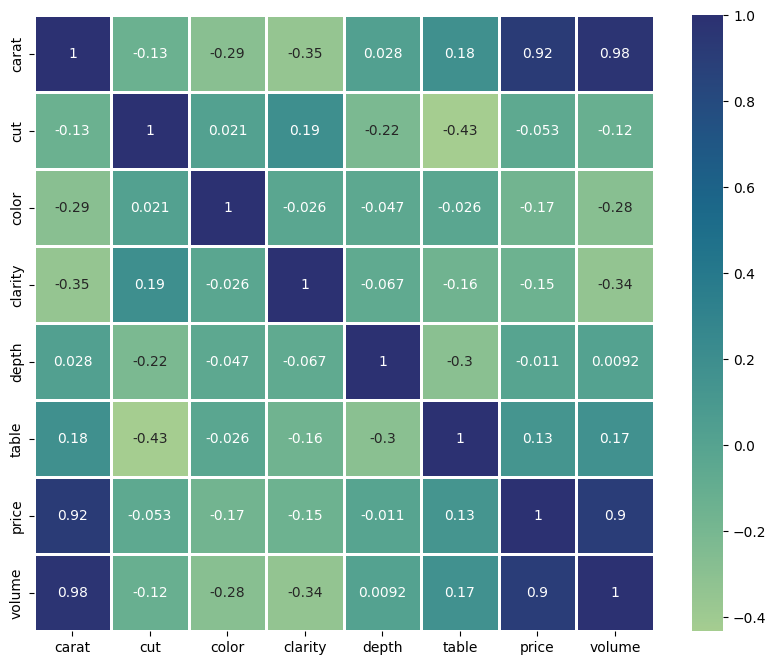

In [138]:
correlation= data.corr()#calculate correlation of features
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation,cmap="crest",annot=True,linewidths=2)

In [139]:
X = data.drop(["price"], axis=1)
Y = data["price"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_s=X_train.copy()
X_train_s[['carat','table','volume','cut','depth']]=scaler.fit_transform(X_train_s[['carat','table','volume','cut','depth']])
normalized_x_train = pd.DataFrame(X_train_s, columns = X_train.columns)
X_train=normalized_x_train
X_test_s=X_test.copy()
X_test_s[['carat','table','volume','cut','depth']]=scaler.transform(X_test_s[['carat','table','volume','cut','depth']])
normalized_x_test = pd.DataFrame(X_test_s, columns = X_test.columns)
X_test=normalized_x_test

Training the model

In [140]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pre = rf.predict(X_test)

In [141]:
print('Random Forest Regressor accuracy: ')
from sklearn.model_selection import cross_val_score
crossr = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 4,verbose = 0)
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error 
mser = mean_squared_error(y_test, rf_pre)
rmser = mean_squared_error(y_test, rf_pre)**0.5
maer = mean_absolute_error(y_test, rf_pre)
r2r = r2_score(y_test, rf_pre)

print('Cross val     : ', crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Random Forest Regressor accuracy: 
Cross val     :  [0.98071998 0.98191628 0.98037694 0.98034933]
R2            :  0.9827031955866223
MAE           :  273.528409252491
MSE (RMSE)    :  280698.7377895662  ( 529.810095967948 )


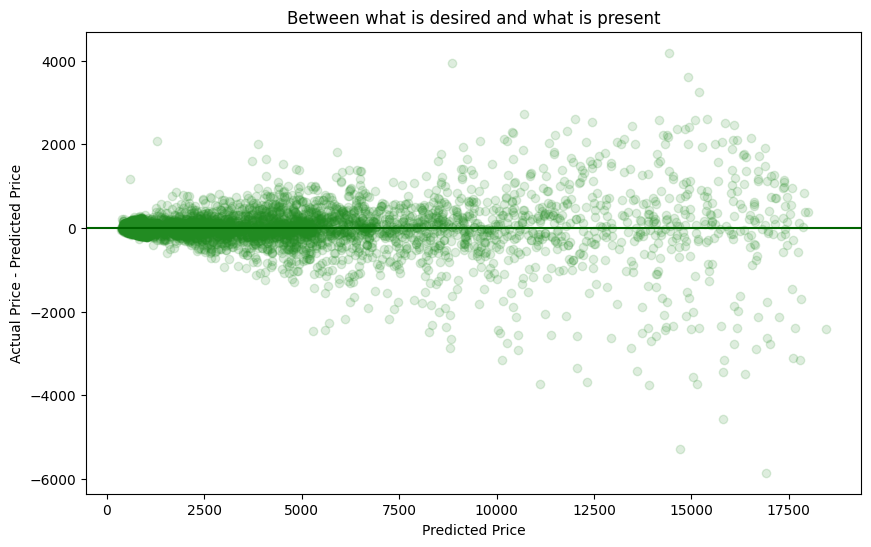

In [142]:
differencePlot(y_test, rf_pre, 'forestgreen', 'darkgreen')